# **ASSIGNMENT 5**: SVD for Image Compression and Reconstruction

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### **Helper** Functions
---

In [22]:
def load_image(path: str):
    try:
        img = Image.open(path)
        img.load()
        print("Image loaded successfully!")
        return img
    except FileNotFoundError:
        print("Error: Image not found.")
        return None
    except OSError:
        print("Error: File is not a valid image.")
        return None

In [23]:
def verify_convert(img: Image.Image):
    if img.mode == "L":
        print("Image is already 8-bit grayscale.")
        return img
    else:
        print(f"Image mode is {img.mode}. Converting it to 8-bit grayscale ...")
        return img.convert("L")

In [24]:
def print_image(img: Image.Image, title="Image"):
    plt.figure(figsize=(6, 6))
    if img.mode == "L":  # Grayscale
        plt.imshow(img, cmap="gray")
    else:  # RGB
        plt.imshow(img)
    plt.axis("off")
    plt.title(title)
    plt.show()

In [25]:
def to_array(img):
    return np.array(img, dtype=np.int32)


In [26]:
def to_image(array):
    arr = np.clip(array, 0, 255).astype(np.uint8)
    return Image.fromarray(arr)


In [27]:
def resize_image(img, max_size=600):
    w, h = img.size
    if max(w, h) <= max_size:
        return img
    if w > h:
        new_w = max_size
        new_h = int(h * (max_size / w))
    else:
        new_h = max_size
        new_w = int(w * (max_size / h))
    
    return img.resize((new_w, new_h), Image.LANCZOS)

### **Task-related** Functions
---

In [28]:
def svd(matrix):
    U, S, VT = np.linalg.svd(matrix, full_matrices=False)
    return U, S, VT


In [29]:
def reconstruct_top_k(U, S, VT, k):
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    VT_k = VT[:k, :]
    
    return U_k @ S_k @ VT_k

In [30]:
def reconstruct_middle_k(U, S, VT, k):
    n = len(S)
    start = (n - k) // 2
    end = start + k

    U_k = U[:, start:end]
    S_k = np.diag(S[start:end])
    VT_k = VT[start:end, :]

    return U_k @ S_k @ VT_k

In [31]:
def reconstruct_smallest_k(U, S, VT, k):
    U_k = U[:, -k:]
    S_k = np.diag(S[-k:])
    VT_k = VT[-k:, :]

    return U_k @ S_k @ VT_k

---
---

Image loaded successfully!
Image mode is RGB. Converting it to 8-bit grayscale ...


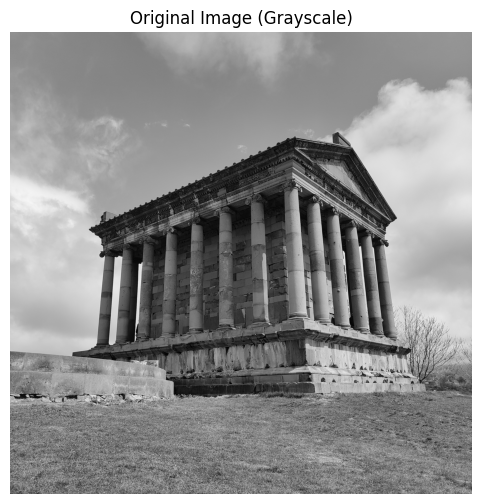

In [32]:
path = r"C:\Users\cazal\OneDrive\Pictures\Armenia 2025\IMG20250415115304.jpg"
img = load_image(path)
img = verify_convert(img)
print_image(img, "Original Image (Grayscale)")


In [33]:
width, height = img.size

print("Width:", width)
print("Height:", height)

Width: 3072
Height: 3072


In [34]:
A = to_array(img)

In [35]:
U, S, VT = svd(A)

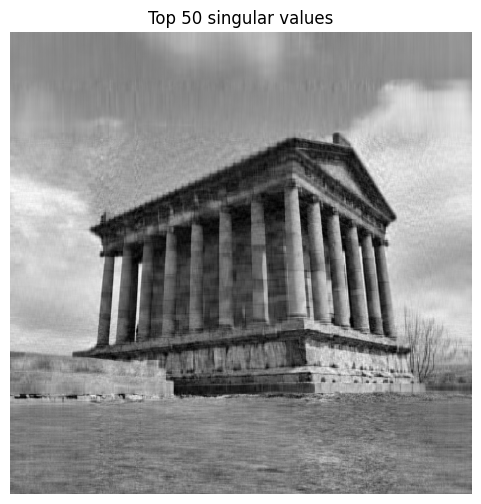

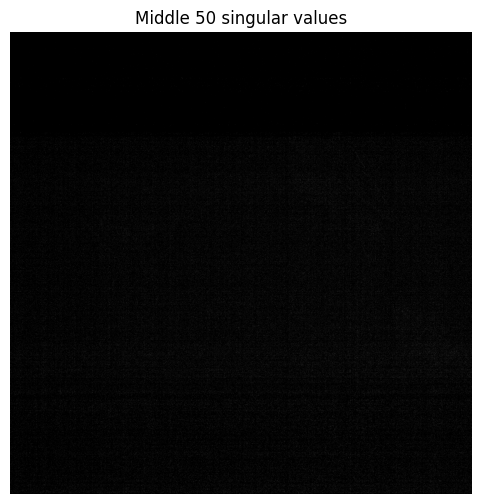

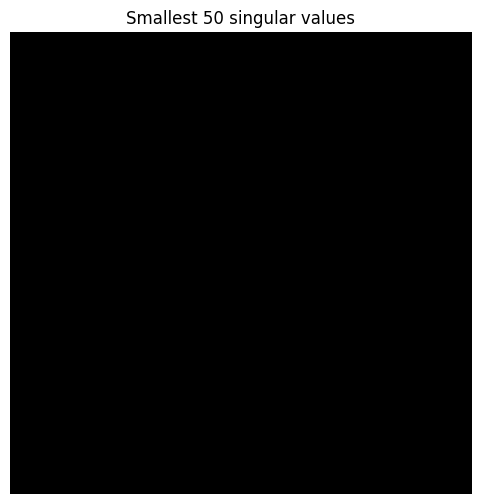

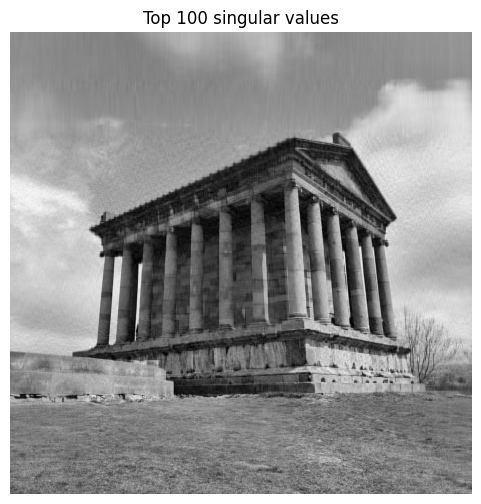

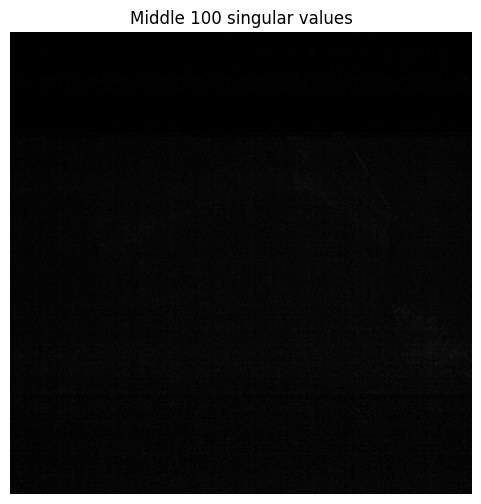

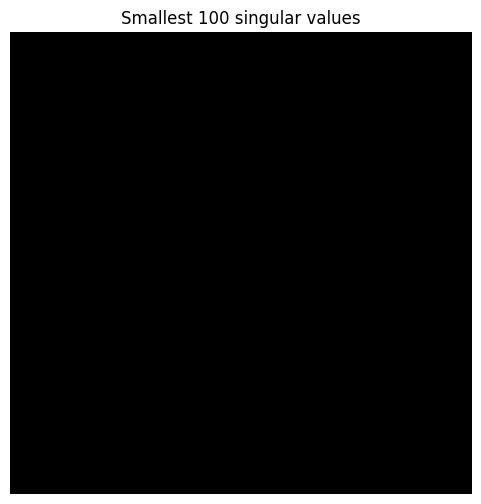

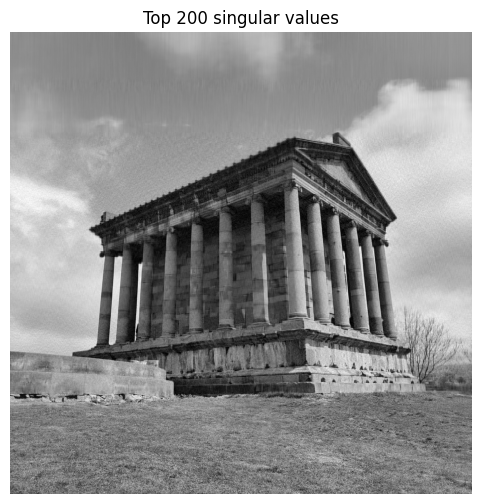

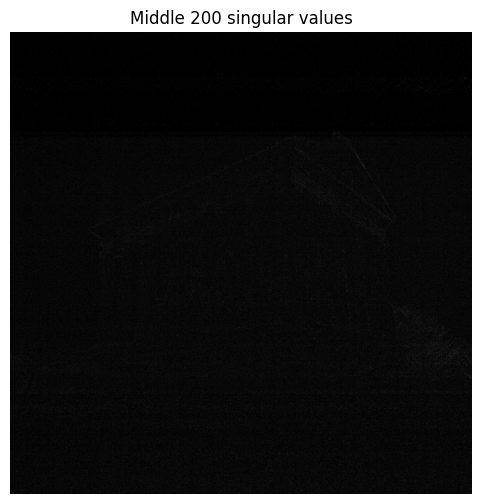

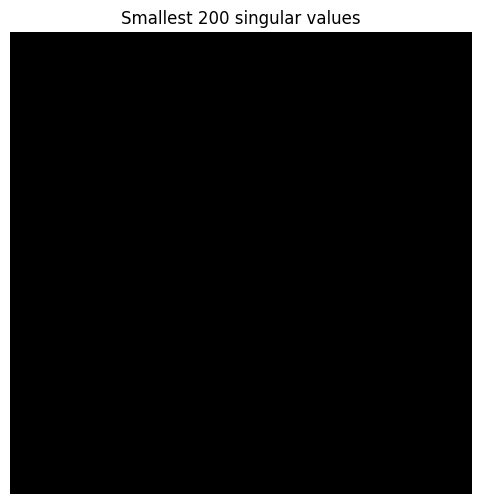

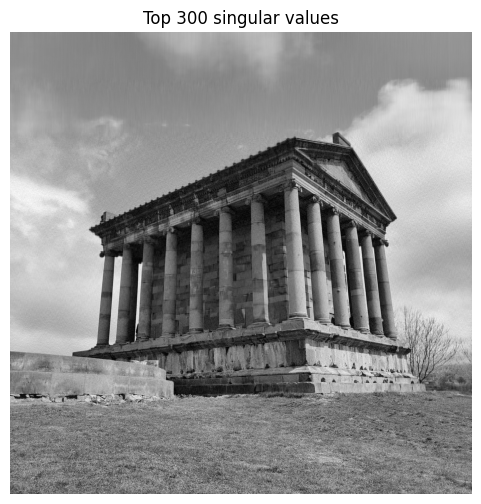

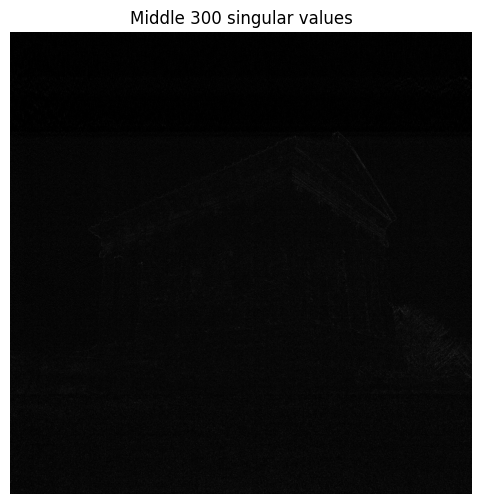

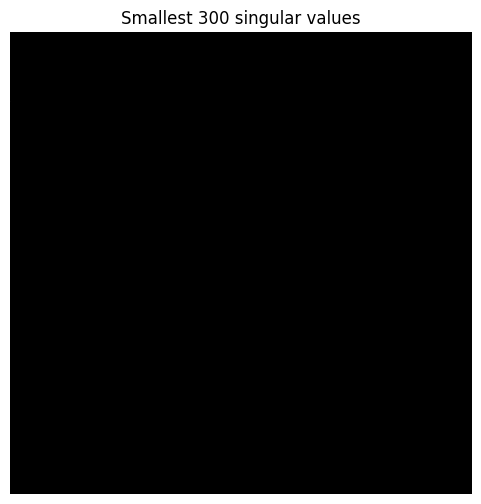

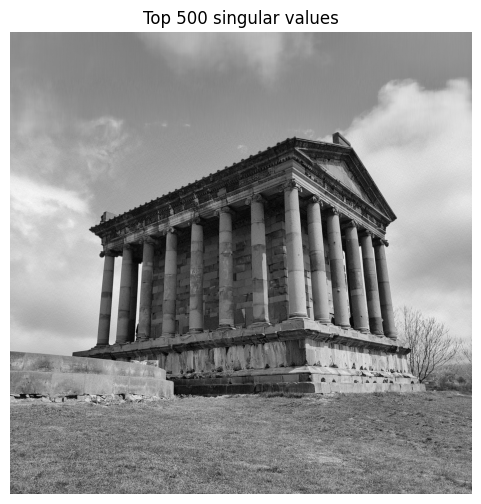

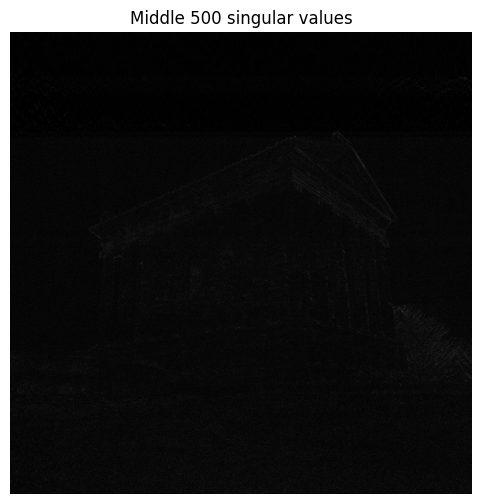

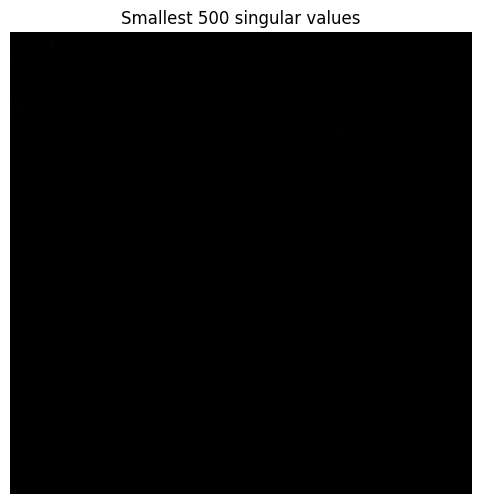

In [36]:
k_values = [50, 100, 200, 300, 500]

for k in k_values:
    recon_top = reconstruct_top_k(U, S, VT, k)
    recon_mid = reconstruct_middle_k(U, S, VT, k)
    recon_small = reconstruct_smallest_k(U, S, VT, k)

    print_image(to_image(recon_top), f"Top {k} singular values")
    print_image(to_image(recon_mid), f"Middle {k} singular values")
    print_image(to_image(recon_small), f"Smallest {k} singular values")


**Observations:**

**1. Top k singular values**

- As k increases, the reconstructed image becomes progressively closer to the original.

- With small k (e.g., k = 50), only the coarse structure of the image is visible.

- With larger k (e.g., k = 500), most details and features are recovered, producing an image almost identical to the original.

**2. Middle k singular values**

- For small k, the reconstruction is mostly noise or faint patterns.

- As k increases, some recognizable details start to appear. However, the main structure of the image is still missing, since the largest singular values (which carry most of the main content) are not used.

**3. Smallest k singular values**

- Even with very large k (e.g., k = 500), the reconstructed image remains mostly black.

- This shows that the smallest singular values encode only fine details or noise, and do not carry meaningful information about the main content of the image.

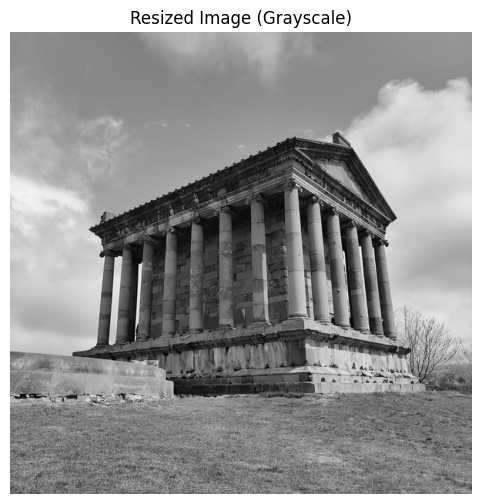

In [37]:
img = resize_image(img)
print_image(img, "Resized Image (Grayscale)")

In [38]:
width, height = img.size

print("Width:", width)
print("Height:", height)

Width: 600
Height: 600


In [39]:
A = to_array(img)

In [40]:
U, S, VT = svd(A)

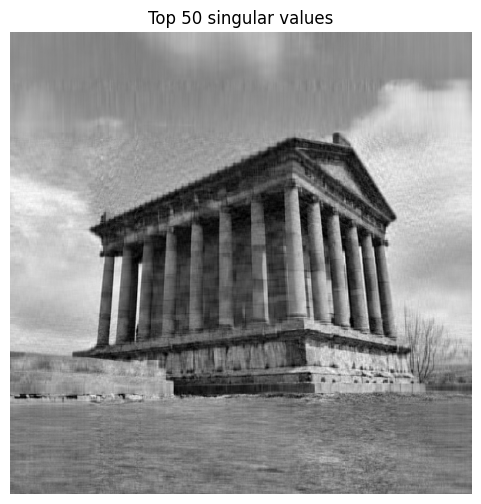

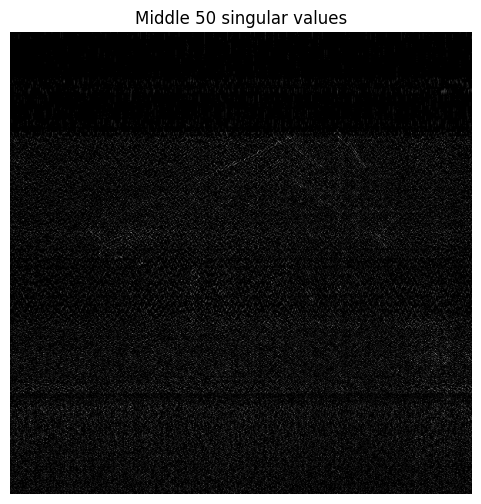

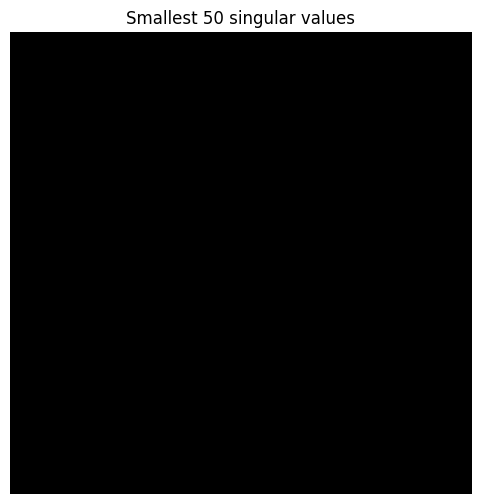

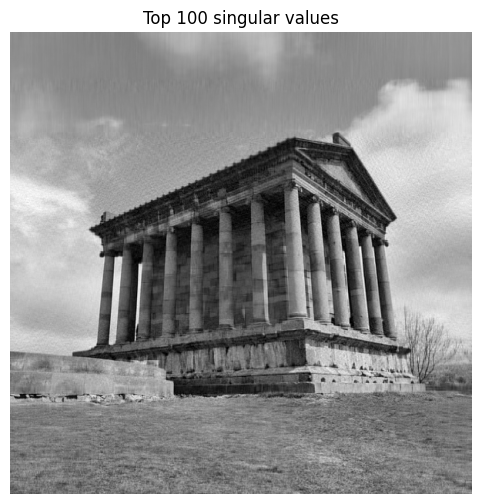

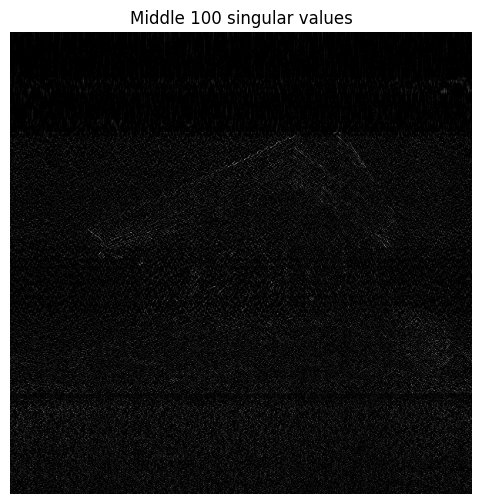

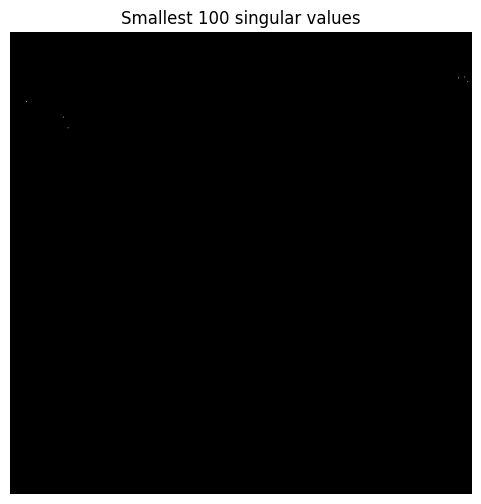

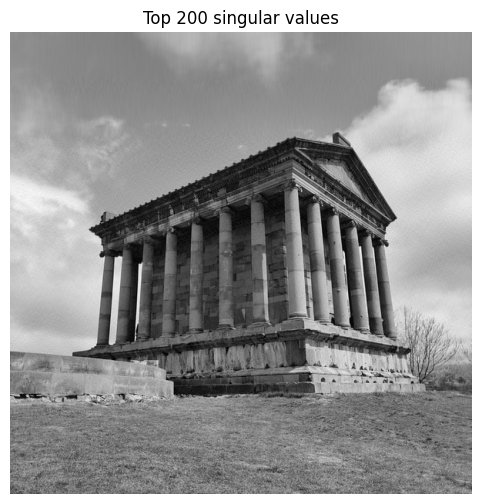

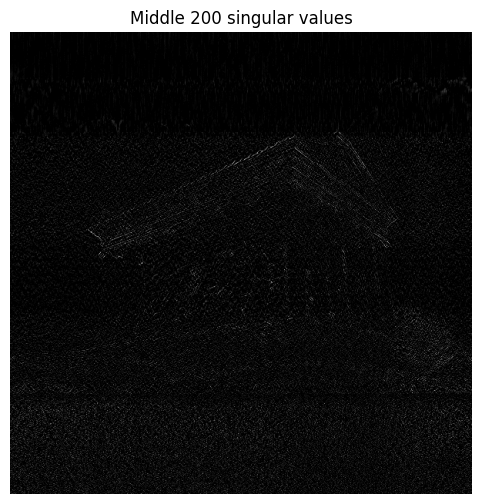

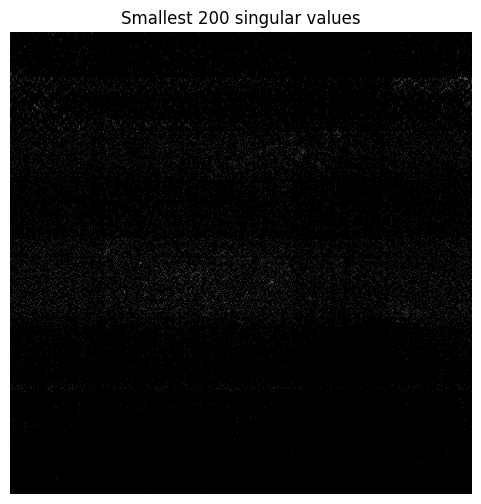

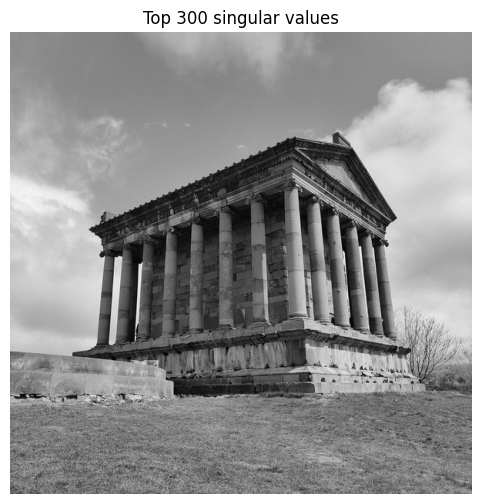

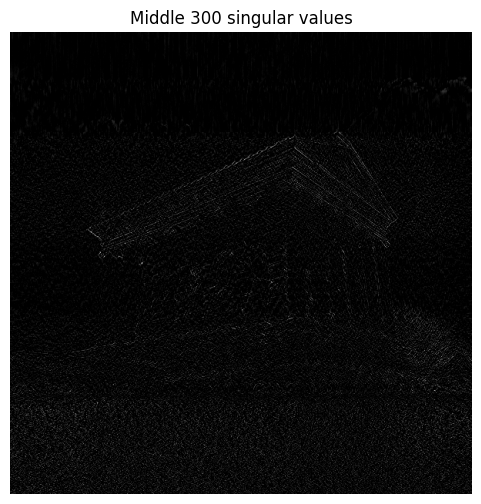

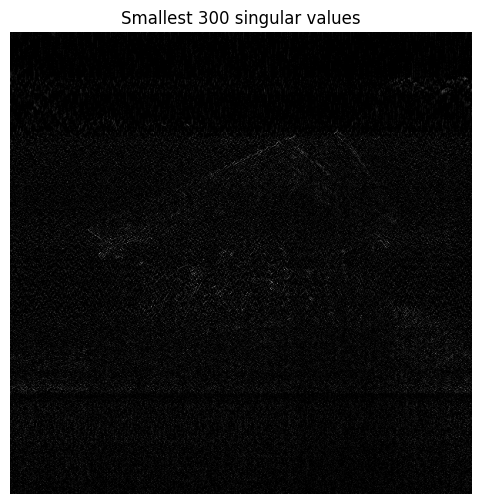

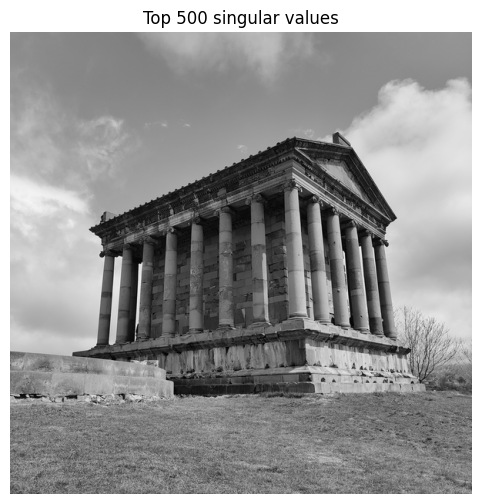

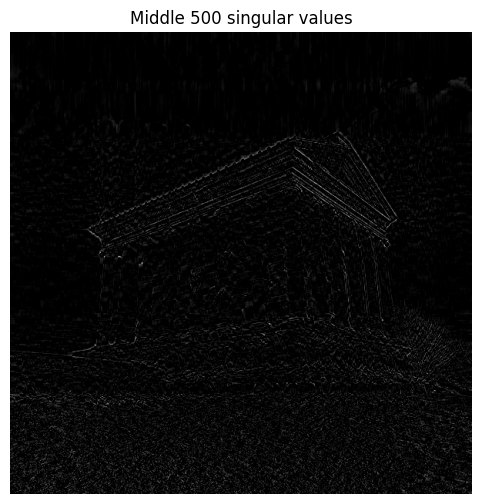

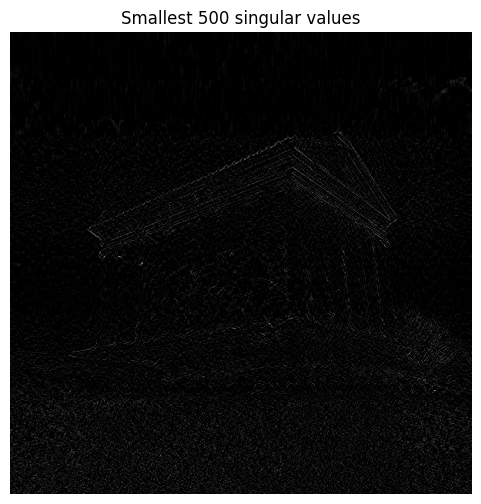

In [41]:
k_values = [50, 100, 200, 300, 500]

for k in k_values:
    recon_top = reconstruct_top_k(U, S, VT, k)
    recon_mid = reconstruct_middle_k(U, S, VT, k)
    recon_small = reconstruct_smallest_k(U, S, VT, k)

    print_image(to_image(recon_top), f"Top {k} singular values")
    print_image(to_image(recon_mid), f"Middle {k} singular values")
    print_image(to_image(recon_small), f"Smallest {k} singular values")


**Observation:**
- When the image is resized to a smaller dimension, the total number of singular values decreases.
- In this case previously invisible details encoded in small singular values are more noticeable, but most meaningful content still comes from the top singular values.